In [50]:
import pandas as pd
from datetime import timedelta
import numpy as np

from matplotlib import cm
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "serif"
plt.rcParams["mathtext.fontset"] = "dejavuserif"

In [51]:
from sklearn.neural_network import MLPRegressor

# Admissions Predictors

In [52]:
df = pd.read_csv('data.csv',  index_col=0, parse_dates=[0])

In [53]:
df

,admissions,discharges,occupancy,day,holiday,temp,feels_like,temp_min,temp_max
2014-04-03,12.0,4.0,8.0,3,0.0,0.236667,-4.625000,-1.404583,2.335417
2014-04-04,11.0,9.0,10.0,4,0.0,2.353929,-3.518214,-0.639286,4.970714
2014-04-05,12.0,1.0,21.0,5,0.0,2.683571,-5.528214,1.019643,4.161786
2014-04-06,8.0,3.0,26.0,6,0.0,0.907917,-4.641250,-1.264583,3.205417
2014-04-07,17.0,15.0,28.0,0,0.0,3.793750,-0.637917,0.904167,7.858333
...,...,...,...,...,...,...,...,...,...
2019-03-27,15.0,19.0,111.0,2,0.0,-0.729167,-5.525833,-2.935000,1.388750
2019-03-28,17.0,21.0,107.0,3,0.0,4.163333,-1.817500,1.362500,7.126250
2019-03-29,16.0,20.0,103.0,4,0.0,5.317083,1.726667,3.033333,7.530417
2019-03-30,17.0,10.0,110.0,5,0.0,3.933750,-0.053437,-0.351250,7.706563


In [72]:
def predictors(df, target_key, self, autocorrelation_lag, external_lag):
    df_predictors = pd.DataFrame(df[target_key])
    if self:
        df_predictors['lf_admissions'] = df_predictors[target_key].rolling(autocorrelation_lag, win_type=None).mean()
        df_predictors['hf_admissions'] = df_predictors[target_key]-df_predictors['lf_admissions']
        df_predictors = df_predictors.dropna()
    return df_predictors

In [73]:
predictors(df,'admissions', True, 7, 0)

,admissions,lf_admissions,hf_admissions
2014-04-09,15.0,12.714286,2.285714
2014-04-10,11.0,12.571429,-1.571429
2014-04-11,12.0,12.714286,-0.714286
2014-04-12,16.0,13.285714,2.714286
2014-04-13,10.0,13.571429,-3.571429
...,...,...,...
2019-03-27,15.0,16.285714,-1.285714
2019-03-28,17.0,15.714286,1.285714
2019-03-29,16.0,15.571429,0.428571
2019-03-30,17.0,16.142857,0.857143


In [68]:
admissions_predictors = pd.DataFrame(df['admissions'])
#admissions_predictors

In [12]:
admissions_predictors['lf_admissions'] = admissions_predictors['admissions'].rolling(7, win_type=None).mean()
admissions_predictors['hf_admissions'] = admissions_predictors['admissions']-admissions_predictors['lf_admissions']
admissions_predictors['day'] = np.sin(2*np.pi*df['day'].values/6)
admissions_predictors['holiday'] = df['holiday']
admissions_predictors['temp_min']= df['temp_min']
admissions_predictors['temp_max']= df['temp_max']
admissions_predictors['temp'] = df['temp']
admissions_predictors['feels_like']=df['feels_like']
admissions_predictors = admissions_predictors.dropna()
admissions_predictors

,admissions,lf_admissions,hf_admissions,day,holiday,temp_min,temp_max,temp,feels_like
2014-04-09,15.0,12.714286,2.285714,8.660254e-01,0.0,1.533750,4.711667,3.203333,-2.495000
2014-04-10,11.0,12.571429,-1.571429,1.224647e-16,0.0,3.385833,8.899167,6.213750,1.190833
2014-04-11,12.0,12.714286,-0.714286,-8.660254e-01,0.0,5.794167,11.271667,8.695000,4.766250
2014-04-12,16.0,13.285714,2.714286,-8.660254e-01,0.0,2.817083,9.627917,6.085417,2.690833
2014-04-13,10.0,13.571429,-3.571429,-2.449294e-16,0.0,8.250833,15.542083,12.088333,9.122917
...,...,...,...,...,...,...,...,...,...
2019-03-27,15.0,16.285714,-1.285714,8.660254e-01,0.0,-2.935000,1.388750,-0.729167,-5.525833
2019-03-28,17.0,15.714286,1.285714,1.224647e-16,0.0,1.362500,7.126250,4.163333,-1.817500
2019-03-29,16.0,15.571429,0.428571,-8.660254e-01,0.0,3.033333,7.530417,5.317083,1.726667
2019-03-30,17.0,16.142857,0.857143,-8.660254e-01,0.0,-0.351250,7.706563,3.933750,-0.053437


## Low Frequency Admission Predictors

In [13]:
lag = 2
y = admissions_predictors['admissions'].iloc[lag:].values
admissions_lf_dict = {}

for i in range(len(admissions_predictors)-lag):
    admissions_lf_dict[i] = admissions_predictors['lf_admissions'].iloc[i:i+lag+1].values

In [14]:
lf_predictors = pd.DataFrame(admissions_lf_dict).T
lf_y = lf_predictors[lag].values #the target values
lf_predictors = lf_predictors.drop([lag], axis=1)

derivative = lf_predictors.apply(np.gradient, axis=1, result_type='expand')

lag_column_names = []
dlag_column_names = []
for i in range(lag):
    string = 'lag_'+str(i)
    dstring = 'dlag_'+str(i)
    lag_column_names = np.append(lag_column_names, string) 
    dlag_column_names = np.append(dlag_column_names, string)    

lf_predictors.columns = lag_column_names
derivative.columns = dlag_column_names

In [15]:
lf_predictors['mean'] = lf_predictors.mean(numeric_only=True, axis=1)
lf_predictors['std'] = lf_predictors.std(numeric_only=True, axis=1)
lf_predictors['max'] = lf_predictors.max(numeric_only=True, axis=1)
lf_predictors['min'] = lf_predictors.min(numeric_only=True, axis=1)

derivative['dmean'] = derivative.mean(numeric_only=True, axis=1)
derivative['dstd'] = derivative.std(numeric_only=True, axis=1)
derivative['dmax'] = derivative.std(numeric_only=True, axis=1)
derivative['dmin'] = derivative.std(numeric_only=True, axis=1)

In [16]:
lf_predictors = pd.concat([lf_predictors, derivative], axis=1, sort=False)
lf_predictors

,lag_0,lag_1,mean,std,max,min,lag_0,lag_1,dmean,dstd,dmax,dmin
0,12.714286,12.571429,12.642857,0.071429,12.714286,0.071429,-0.142857,-0.142857,-0.142857,0.0,0.071429,0.101015
1,12.571429,12.714286,12.642857,0.071429,12.714286,0.071429,0.142857,0.142857,0.142857,0.0,0.071429,0.063888
2,12.714286,13.285714,13.000000,0.285714,13.285714,0.285714,0.571429,0.571429,0.571429,0.0,0.285714,0.255551
3,13.285714,13.571429,13.428571,0.142857,13.571429,0.142857,0.285714,0.285714,0.285714,0.0,0.142857,0.127775
4,13.571429,12.714286,13.142857,0.428571,13.571429,0.428571,-0.857143,-0.857143,-0.857143,0.0,0.428571,0.606092
...,...,...,...,...,...,...,...,...,...,...,...,...
1811,16.571429,16.000000,16.285714,0.285714,16.571429,0.285714,-0.571429,-0.571429,-0.571429,0.0,0.285714,0.404061
1812,16.000000,16.285714,16.142857,0.142857,16.285714,0.142857,0.285714,0.285714,0.285714,0.0,0.142857,0.127775
1813,16.285714,15.714286,16.000000,0.285714,16.285714,0.285714,-0.571429,-0.571429,-0.571429,0.0,0.285714,0.404061
1814,15.714286,15.571429,15.642857,0.071429,15.714286,0.071429,-0.142857,-0.142857,-0.142857,0.0,0.071429,0.101015


## High Frequency Admission Predictors

In [17]:
len(admissions_predictors)
lag = 2
admissions_hf_dict = {}
min_temp_hf_dict = {}
max_temp_hf_dict = {}
mean_temp_hf_dict = {}
feels_like_hf_dict = {}

dayofweek_hf = admissions_predictors['day'].iloc[lag:].values
holidays_hf = admissions_predictors['holiday'].iloc[lag:].values

for i in range(len(admissions_predictors)-lag):
    admissions_hf_dict[i] = admissions_predictors['hf_admissions'].iloc[i:i+lag+1].values
    
    min_temp_hf_dict[i] = admissions_predictors['temp_min'].iloc[i:i+lag+1].values
    max_temp_hf_dict[i] = admissions_predictors['temp_max'].iloc[i:i+lag+1].values
    mean_temp_hf_dict[i] = admissions_predictors['temp'].iloc[i:i+lag+1].values
    feels_like_hf_dict[i] = admissions_predictors['feels_like'].iloc[i:i+lag+1].values

In [18]:
weather_1 = pd.DataFrame(min_temp_hf_dict).T
weather_2 = pd.DataFrame(max_temp_hf_dict).T
weather_3 = pd.DataFrame(mean_temp_hf_dict).T
weather_4 = pd.DataFrame(feels_like_hf_dict).T

In [19]:
hf_predictors = pd.DataFrame(admissions_hf_dict).T
hf_y = hf_predictors[lag].values #the target values
hf_predictors = hf_predictors.drop([lag], axis=1)

derivative = hf_predictors.apply(np.gradient, axis=1, result_type='expand')

lag_column_names = []
dlag_column_names = []
for i in range(lag):
    string = 'lag_'+str(i)
    dstring = 'dlag_'+str(i)
    lag_column_names = np.append(lag_column_names, string) 
    dlag_column_names = np.append(dlag_column_names, string)    

hf_predictors.columns = lag_column_names
derivative.columns = dlag_column_names

In [20]:
hf_predictors['mean'] = hf_predictors.mean(numeric_only=True, axis=1)
hf_predictors['std'] = hf_predictors.std(numeric_only=True, axis=1)
hf_predictors['max'] = hf_predictors.max(numeric_only=True, axis=1)
hf_predictors['min'] = hf_predictors.min(numeric_only=True, axis=1)

derivative['dmean'] = derivative.mean(numeric_only=True, axis=1)
derivative['dstd'] = derivative.std(numeric_only=True, axis=1)
derivative['dmax'] = derivative.std(numeric_only=True, axis=1)
derivative['dmin'] = derivative.std(numeric_only=True, axis=1)

In [21]:
hf_predictors = pd.concat([hf_predictors, derivative], axis=1, sort=False)
hf_predictors['day'] = dayofweek_hf
hf_predictors['holiday'] = holidays_hf
hf_predictors =  pd.concat([hf_predictors, weather_1, weather_2, weather_3, weather_4], axis=1, sort=False)

In [22]:
hf_predictors

,lag_0,lag_1,mean,std,max,min,lag_0,lag_1,dmean,dstd,...,2,0,1,2,0,1,2,0,1,2
0,2.285714,-1.571429,3.571429e-01,1.928571,2.285714,-1.571429,-3.857143,-3.857143,-3.857143,0.0,...,5.794167,4.711667,8.899167,11.271667,3.203333,6.213750,8.695000,-2.495000,1.190833,4.766250
1,-1.571429,-0.714286,-1.142857e+00,0.428571,0.428571,-1.571429,0.857143,0.857143,0.857143,0.0,...,2.817083,8.899167,11.271667,9.627917,6.213750,8.695000,6.085417,1.190833,4.766250,2.690833
2,-0.714286,2.714286,1.000000e+00,1.714286,2.714286,-0.714286,3.428571,3.428571,3.428571,0.0,...,8.250833,11.271667,9.627917,15.542083,8.695000,6.085417,12.088333,4.766250,2.690833,9.122917
3,2.714286,-3.571429,-4.285714e-01,3.142857,3.142857,-3.571429,-6.285714,-6.285714,-6.285714,0.0,...,8.286800,9.627917,15.542083,19.810000,6.085417,12.088333,14.343600,2.690833,9.122917,11.744000
4,-3.571429,-1.714286,-2.642857e+00,0.928571,0.928571,-3.571429,1.857143,1.857143,1.857143,0.0,...,2.373077,15.542083,19.810000,9.077949,12.088333,14.343600,5.943846,9.122917,11.744000,2.388974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1811,0.428571,0.000000,2.142857e-01,0.214286,0.428571,0.000000,-0.428571,-0.428571,-0.428571,0.0,...,-2.935000,-0.115000,-0.566667,1.388750,-2.319583,-2.332500,-0.729167,-8.739167,-8.605000,-5.525833
1812,0.000000,-1.285714,-6.428571e-01,0.642857,0.642857,-1.285714,-1.285714,-1.285714,-1.285714,0.0,...,1.362500,-0.566667,1.388750,7.126250,-2.332500,-0.729167,4.163333,-8.605000,-5.525833,-1.817500
1813,-1.285714,1.285714,8.881784e-16,1.285714,1.285714,-1.285714,2.571429,2.571429,2.571429,0.0,...,3.033333,1.388750,7.126250,7.530417,-0.729167,4.163333,5.317083,-5.525833,-1.817500,1.726667
1814,1.285714,0.428571,8.571429e-01,0.428571,1.285714,0.428571,-0.857143,-0.857143,-0.857143,0.0,...,-0.351250,7.126250,7.530417,7.706563,4.163333,5.317083,3.933750,-1.817500,1.726667,-0.053437


# Forecasting

## Low Frequency

In [23]:
l=len(y)
f = 0.75

X_lf = lf_predictors.values

X_lf_train = X_lf[0:int(f*l)]
X_lf_test = X_lf[int(f*l):]
y_lf_train = lf_y[0:int(f*l)]
y_lf_test = lf_y[int(f*l):]

y_test = y[int(f*l):]

In [24]:
model_lf = MLPRegressor(activation='relu',solver='lbfgs', alpha=1,
                    hidden_layer_sizes=(350, 350), random_state=1,
                    max_iter=1000)

In [25]:
model_lf.fit(X_lf_train, y_lf_train)

MLPRegressor(activation='relu', alpha=1, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(350, 350), learning_rate='constant',
             learning_rate_init=0.001, max_iter=1000, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [26]:
y_lf_forecast = model_lf.predict(X_lf_test)

In [42]:
from scipy.signal import find_peaks
peaks, _ = find_peaks(y_test, height=np.mean(y_test))
valleys, _=find_peaks(1-y_test, height=np.mean(1-y_test))

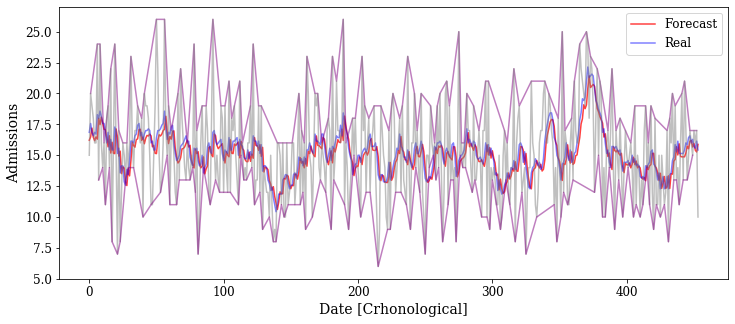

In [49]:
plt.figure(figsize=(12,5))

plt.plot(y_lf_forecast, color='red', alpha=0.75, label='Forecast')
plt.plot(y_lf_test, color='blue', alpha=0.5, label='Real')

plt.plot(peaks,y_test[peaks], color='purple', alpha=0.5)
plt.plot(y_test, color='gray', alpha = 0.5)
plt.plot(valleys,y_test[valleys], color='purple', alpha = 0.5)



plt.ylabel('Admissions', fontsize=14)
plt.xlabel('Date [Crhonological]', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc='best', fontsize=12)
plt.savefig('forecasting_lf.png', bbox='tight')
plt.show()

## High Frequency

In [32]:
X_hf = hf_predictors.values

X_hf_train = X_hf[0:int(f*l)]
X_hf_test = X_hf[int(f*l):]
y_hf_train = hf_y[0:int(f*l)]
y_hf_test = hf_y[int(f*l):]

In [33]:
model_hf = MLPRegressor(activation='relu',solver='lbfgs', alpha=1,
                    hidden_layer_sizes=(100, 100), random_state=1,
                    max_iter=500)

In [34]:
y_hf_forecast = np.array([])
y_hf_ub = np.array([])
y_hf_lb = np.array([])

X_aux = X_hf_train
y_aux = y_hf_train

for i in range(50):
    l_aux = X_aux.shape[0]
    aux_forecast = np.array([])
    model_hf.fit(X_aux, y_aux)
    forecast = model_hf.predict(X_hf_test[i].reshape(1,-1))
        
    y_hf_forecast = np.append(y_hf_forecast, forecast)

    X_aux = np.append(X_hf_train, [X_hf_test[i]], axis=0)
    y_aux = np.append(y_hf_train, y_hf_test[i])

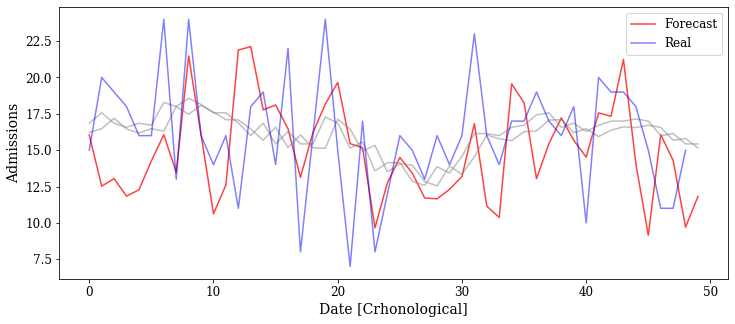

In [38]:
plt.figure(figsize=(12,5))

plt.plot(y_hf_forecast+y_lf_forecast[0:50], color='red', alpha=0.75, label='Forecast')
plt.plot(y_lf_forecast[0:50], color='gray',alpha=0.5)
plt.plot(y_lf_test[0:50], color='gray',alpha=0.5)


plt.plot(y_test[0:49], color='blue', alpha=0.5, label='Real')


plt.ylabel('Admissions', fontsize=14)
plt.xlabel('Date [Crhonological]', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc='best', fontsize=12)
plt.savefig('forecasting.png', bbox='tight')
plt.show()

## Everything at once

In [27]:
model_hf.fit(X_hf_train, y_hf_train)

MLPRegressor(activation='relu', alpha=1, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100, 100), learning_rate='constant',
             learning_rate_init=0.001, max_iter=500, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [28]:
forecast = model_hf.predict(X_hf_test)

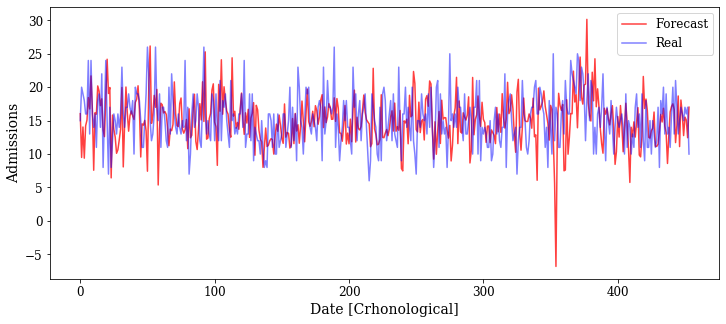

In [30]:
plt.figure(figsize=(12,5))

plt.plot(forecast+y_lf_forecast, color='red', alpha=0.75, label='Forecast')
plt.plot(y_test, color='blue', alpha=0.5, label='Real')


plt.ylabel('Admissions', fontsize=14)
plt.xlabel('Date [Crhonological]', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc='best', fontsize=12)
plt.savefig('forecasting.png', bbox='tight')
plt.show()